# Spectrum

In [70]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../src/")

import partition_energy
import utils

In [71]:
hamils = partition_energy.read_splits("hamiltonians", (1000, 28, 28), "1000ps_100fs", screened=False)
distan = partition_energy.read_splits("distances", (1000, 27, 27), "1000ps_100fs", screened=False)
dipols = partition_energy.read_splits("transition_dipoles", (1000, 27, 3), "1000ps_100fs", screened=False)
eigvec = partition_energy.read_splits("eigenvectors", (1000, 28, 28), "1000ps_100fs", screened=False)
eigvec = eigvec.transpose(0, 2, 1)

states = partition_energy.read_splits("states_energies", (1000, 28), "1000ps_100fs", screened=False)

In [73]:
temp = utils.random_unit_vectors_polar(100000)

fig, ax = plt.subplots(1, 3)
ax[0].scatter(temp[:, 0], temp[:, 1], alpha=0.005)
ax[1].scatter(temp[:, 0], temp[:, 2], alpha=0.005)
ax[2].scatter(temp[:, 1], temp[:, 2], alpha=0.005)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')

fig.set_size_inches(18, 6)

temp = utils.random_unit_vectors(100000)

fig, ax = plt.subplots(1, 3)
ax[0].scatter(temp[:, 0], temp[:, 1], alpha=0.005)
ax[1].scatter(temp[:, 0], temp[:, 2], alpha=0.005)
ax[2].scatter(temp[:, 1], temp[:, 2], alpha=0.005)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')

fig.set_size_inches(18, 6)

temp = utils.random_unit_vectors_uniform(100000)

fig, ax = plt.subplots(1, 3)
ax[0].scatter(temp[:, 0], temp[:, 1], alpha=0.005)
ax[1].scatter(temp[:, 0], temp[:, 2], alpha=0.005)
ax[2].scatter(temp[:, 1], temp[:, 2], alpha=0.005)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')

fig.set_size_inches(18, 6)

NameError: name 'np' is not defined

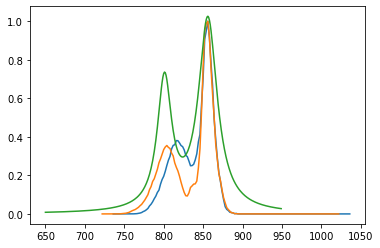

In [45]:

fig, ax = plt.subplots()

reference(states, dipols, eigvec, ax, 856)
trial_screening(distan, hamils, dipols, 0., 0., 1.4, ax, 856)
plot_experimental(ax)


In [65]:
def plot_density(vecs, ax):
    density = np.square(vecs)
    sum_dens = np.sum(density, axis=0)

    print(sum_dens.shape)

    b800 = list(range(1, 27, 3))
    b850a = list(range(2, 27, 3))
    b850b = list(range(3, 27, 3))

    ax.imshow(sum_dens[1:, 1:][b800+b850a+b850b], cmap='YlGn')
    
    return sum_dens[1:, 1:][b800+b850a+b850b]

(28, 28)
(28, 28)


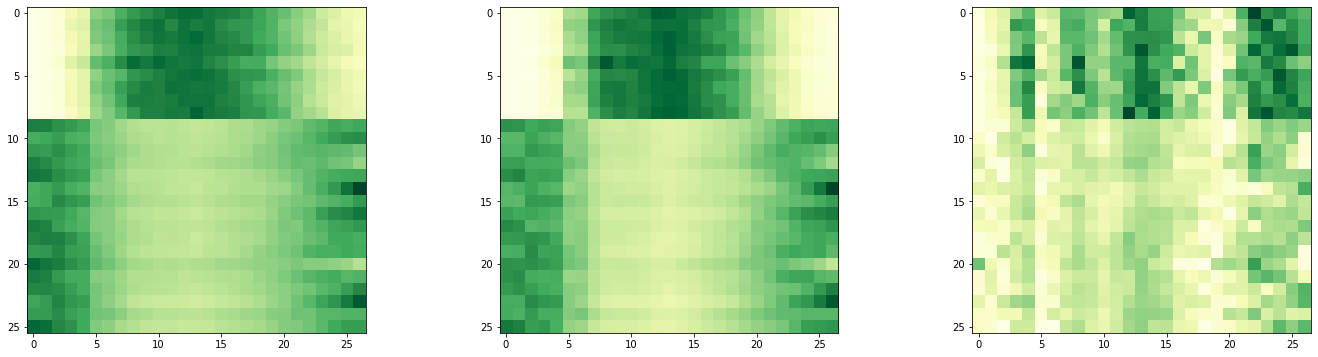

In [69]:
screened_states, screened_eigvecs = screen_hamiltonians(distan, hamils, 0., 0., 1.4)

fig, ax = plt.subplots(1, 3)

a = plot_density(eigvec, ax[0])
b = plot_density(screened_eigvecs, ax[1])
ax[2].imshow(abs(a-b), cmap='YlGn')

fig.set_size_inches(24,6)